In [49]:
import tensorflow_datasets as tfds
from tensorflow import keras
import tensorflow
import numpy as np

### trouver des jeux de donnees

In [11]:
# https://www.tensorflow.org/datasets/overview
# https://www.tensorflow.org/datasets/catalog/overview
laliste = tfds.list_builders()  # affichage de la liste des images de tensorflow
laliste

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2002',
 'conll2003',
 'controlled_noisy_web_labels'

In [12]:
# voir les informations concernant l'image de rocher papier cisor
builder = tfds.builder('rock_paper_scissors')
info = builder.info

In [13]:
# chargement 
ds_train = tfds.load(name='rock_paper_scissors', split='train')
ds_test = tfds.load(name='rock_paper_scissors', split='test')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Nelson Beneche\tensorflow_datasets\rock_paper_scissors\3.0.0.incompleteQ3H1JS\rock_paper_sc…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Nelson Beneche\tensorflow_datasets\rock_paper_scissors\3.0.0.incompleteQ3H1JS\rock_paper_sc…

Dataset rock_paper_scissors downloaded and prepared to C:\Users\Nelson Beneche\tensorflow_datasets\rock_paper_scissors\3.0.0. Subsequent calls will reuse this data.


In [18]:
ds_train, ds_test

(<_PrefetchDataset element_spec={'image': TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>,
 <_PrefetchDataset element_spec={'image': TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>)

The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


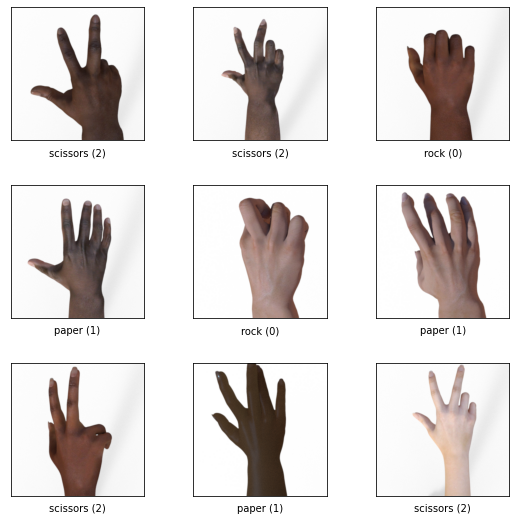

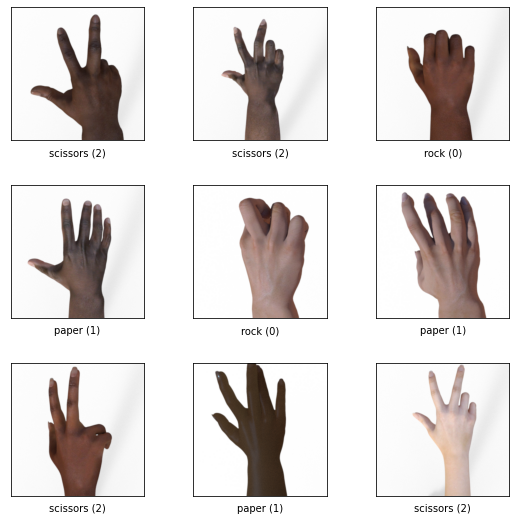

In [15]:
# affichage de l'image
fig = tfds.show_examples(info, ds_train)
fig

The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


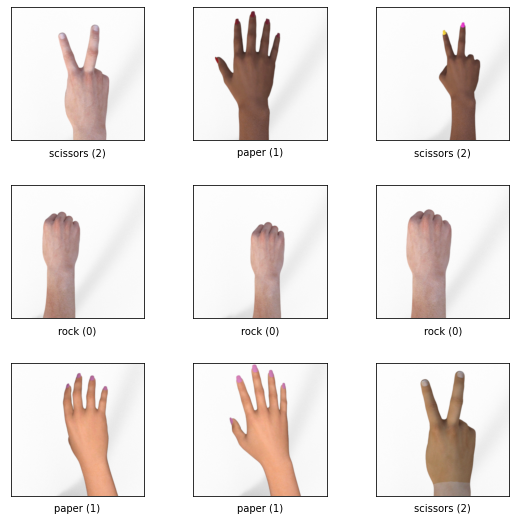

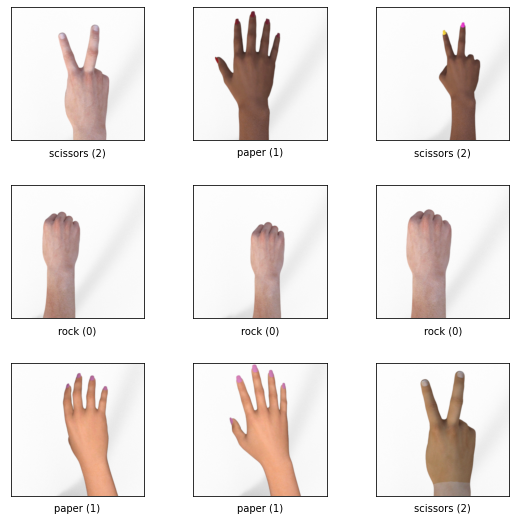

In [21]:
tfds.show_examples(info, ds_test)

### Pretraitement de donnees cela revient a redimensionner les images sur une taille uniforme, la normalisation des valeurs des pixels, la conversion en niveaux de gris

In [39]:
ds = ds_train.take(1) # prendre une seule exemple

In [73]:
# utiliser une comprehension de liste
train_images = np.array([example['image'].numpy()[:,:,0] for example in ds_train])
train_images.shape

(2520, 300, 300)

In [55]:
type(train_images.shape)

tuple

In [59]:
train_label = np.array([example['label'].numpy()[:,:,0] for example in ds_train])
train_label.shape

(2520,)

In [76]:
test_images = np.array([example['image'].numpy()[:,:,0] for example in ds_test])
test_images.shape

(372, 300, 300)

In [80]:
test_label = np.array([example['label'].numpy() for example in ds_test])
test_label.shape

(372,)

### Redimensionner la taille des images

In [84]:
train_images = train_images.reshape(2520, 300, 300, 1)
test_images = test_images.reshape(372, 300, 300, 1)
f"donnees entrainement:{train_images.shape}, donnees de test:{test_images.shape}"

'donnees entrainement:(2520, 300, 300, 1), donnees de test:(372, 300, 300, 1)'

In [96]:
train_images.dtype


dtype('uint8')

In [107]:
# train_images = train_images.astype('float64')
# test_images = test_images.astype('float32')

In [1]:
train_images.astype('int32')
train_images = train_images/255.0
test_images = test_images/255.0

NameError: name 'train_images' is not defined